# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_frame = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
merge_frame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [27]:
# Checking the number of mice.
len(merge_frame['Mouse ID'].unique())

249

In [3]:
merge_frame.duplicated(subset= ['Mouse ID', 'Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_frame.loc[merge_frame.duplicated(subset= ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = merge_frame.loc[merge_frame['Mouse ID'] == 'g989']
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_frame = merge_frame[merge_frame['Mouse ID'].isin(duplicate_mice)==False]
merge_frame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(merge_frame['Mouse ID'].unique())

249

In [8]:
merge_frame.groupby('Drug Regimen')

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = merge_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_table = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median
})
summary_table

,Mean Tumor Volume,Median Tumor Volume
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.322552,50.854632
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = merge_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats['SEM'] = summary_stats['std'] / (merge_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].count() ** 0.5)
summary_stats

,mean,median,var,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

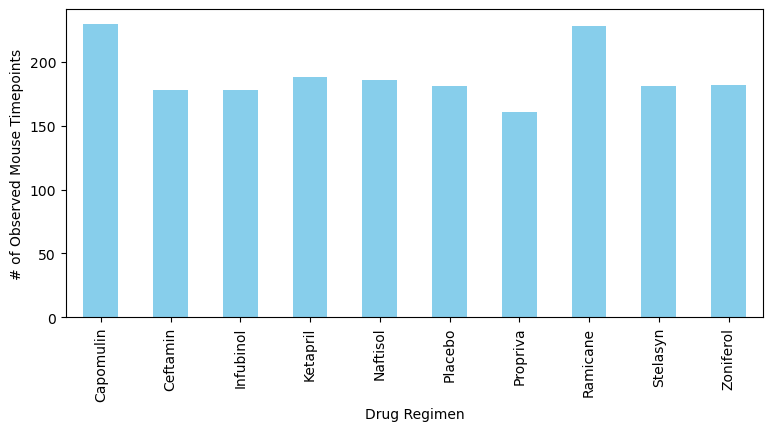

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = merge_frame.groupby('Drug Regimen').size()
regimen_counts.plot(kind='bar', figsize=(9, 4), color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

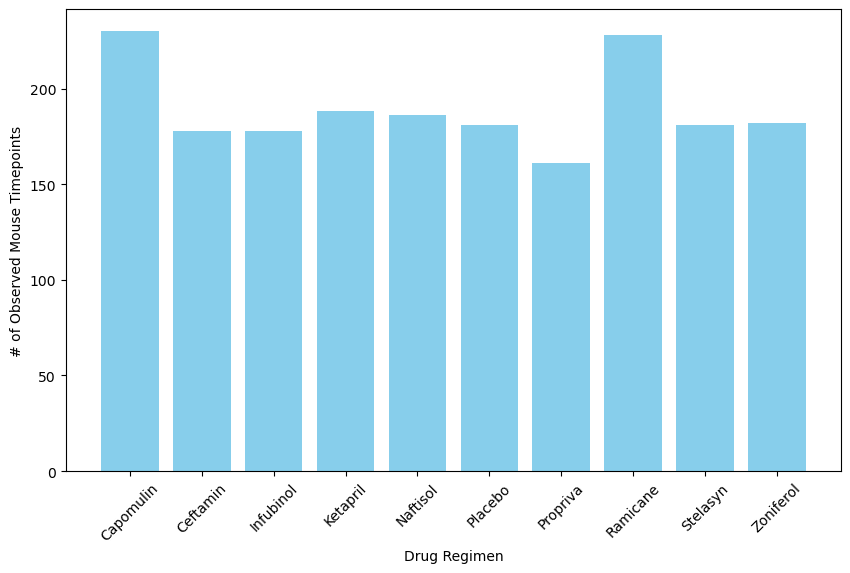

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = merge_frame.groupby('Drug Regimen').size()
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

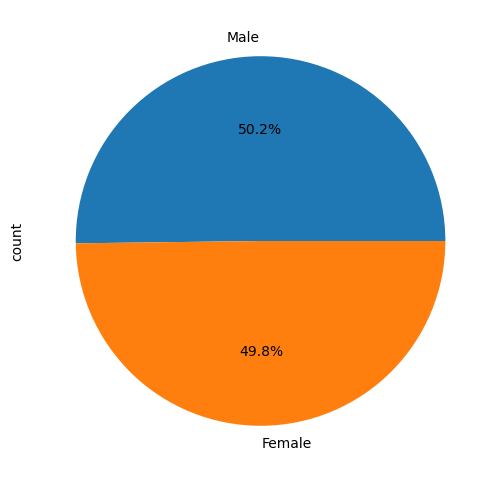

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = merge_frame[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
# Make the pie chart
gender_counts.plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%',)
plt.ylabel('count')
plt.show()

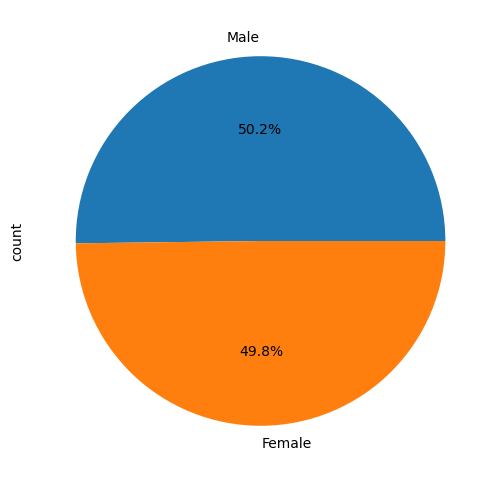

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = merge_frame[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
# Make the pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = merge_frame.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = last_timepoint_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_timepoint_df.merge(merge_frame, on=['Mouse ID', 'Timepoint'], how='left')
#final_tumor_volume_df = merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

In [23]:

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
volume_list = []
# Iterate over each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merge_frame.loc[merge_frame['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    volume_list.append(subset)
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Find potential outliers
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print results
    if outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{treatment}'s potential outliers:")
        print(outliers)

Capomulin's potential outliers:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


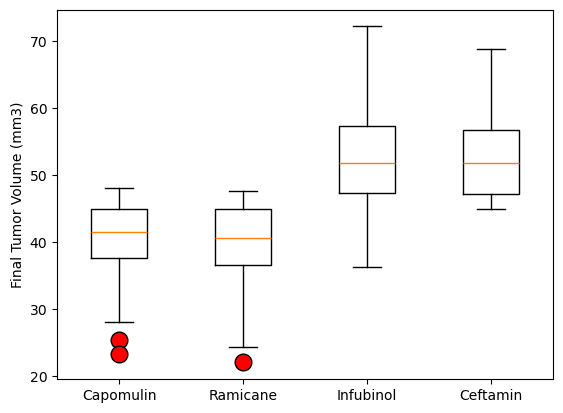

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
color_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(volume_list, labels = treatments, flierprops=color_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

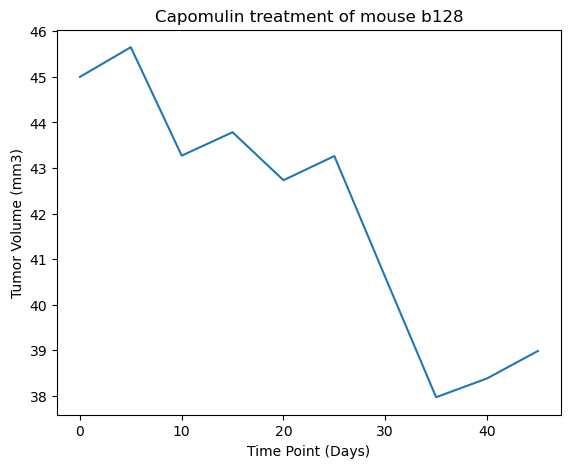

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = merge_frame[merge_frame['Drug Regimen'] == 'Capomulin']
mouse_id = 'b128'  
mouse_data = merge_frame[merge_frame['Mouse ID'] == mouse_id]
plt.figure(figsize=(6.5, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

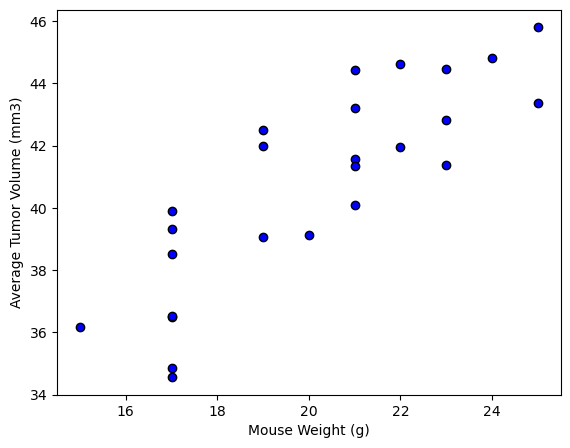

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merge_frame[merge_frame['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_df = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Extract the relevant data
X = merged_df['Weight (g)'] 
y = merged_df['Tumor Volume (mm3)'] 

# Create the scatter plot
plt.figure(figsize=(6.5, 5))
plt.scatter(X, y, color='blue', marker='o', edgecolor='black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The correlation between mouse weight and the avergae tumor volume : 0.8419363424694722


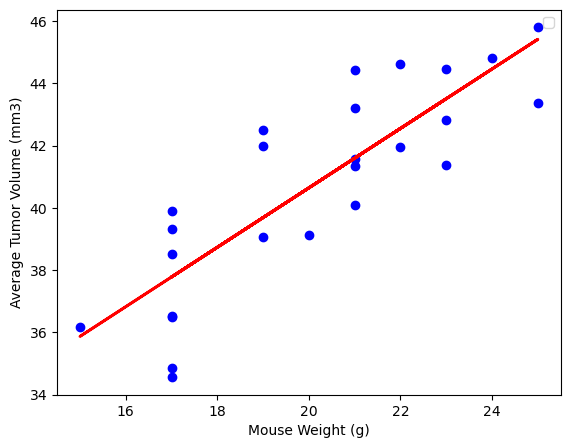

In [30]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = merge_frame[merge_frame['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge the average tumor volume with mouse weight data
merged_df = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Extract the relevant data
X = merged_df[['Weight (g)']].values  
y = merged_df['Tumor Volume (mm3)'].values  

# Calculate the correlation coefficient
correlation = np.corrcoef(X.flatten(), y)[0, 1]
correlation_rounded = round(correlation, 2)
print(f"The correlation between mouse weight and the avergae tumor volume : {correlation}")

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict tumor volumes
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(6.5, 5))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()
